импортируем библиотеки 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

stud = pd.read_csv("stud_math.csv")

In [2]:
def float_to_int(x):
    if x is None:
        return x
    else:
        number_pr = str(x).find(".")
        number = x[:number_pr]
        return int(number)

In [3]:
display(stud.head(25))
display(stud.info(memory_usage="deep"))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

rename of columns which are not suitable for as 

In [4]:
stud = stud.rename(columns={"studytime, granular": "studytime"})

# row school

number of schools

In [5]:
stud.loc[:, ["school"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [6]:
stud.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

У нас только две школы. Премуиществееное количество данный со школы GP.

тут пустых строк нет 

# sex

In [7]:
stud.loc[:, ["sex"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [8]:
stud.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

 Девушек немного больше чем парней  в целом. Проверим по школам различия в поле

<AxesSubplot:>

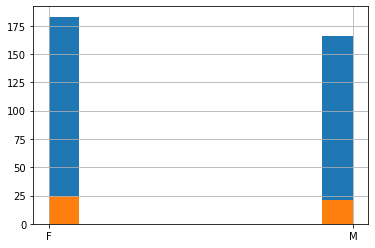

In [9]:
stud[stud.school == "GP"].sex.hist()
stud[stud.school == "MS"].sex.hist()

В целом различий между школами в гендере не наблюдаю 

тут пустых строк нет 

# age

Возраст от 15 до 22 

In [10]:
stud.age.head()

0    18
1    17
2    15
3    15
4    16
Name: age, dtype: int64

In [11]:
stud.loc[:, ["age"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [12]:
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

тут пустых строк нет 

# address

тип адреса  U - город , R - за городом 

In [13]:
stud.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [14]:
stud.loc[:, ["address"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


тут наблюдаем 395-378=17 Nan значений надо их заменить на None

In [15]:
stud.address = stud.address.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.address = stud.address.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# famsize

Размер семьи  LE3 <= 3, GT3 > 3

In [16]:
stud.loc[:, ["famsize"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


тут наблюдаем 395-368=27 Nan значений надо их заменить на None

In [17]:
stud.famsize = stud.famsize.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.famsize = stud.famsize.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [18]:
stud.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [19]:
stud.famsize

0      None
1       GT3
2       LE3
3       GT3
4       GT3
       ... 
390     LE3
391     LE3
392     GT3
393     LE3
394     LE3
Name: famsize, Length: 395, dtype: object

# Pstatus

статус совместного жилья родителей. T живут вместе, A - раздельно 


In [20]:
stud.loc[:, ["Pstatus"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [21]:
stud.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

тут наблюдаем 395-350=45 Nan значений надо их заменить на None

In [22]:
stud.Pstatus = stud.Pstatus.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.Pstatus = stud.Pstatus.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Medu

 образование матери    ( 0- нет, 1- 4 класса, 2- 5-9классов, 3- средне спец или 11 класс, 4- высшее)

In [23]:
stud.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [24]:
stud.Medu = stud.Medu.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.Medu = stud.Medu.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [25]:
stud.Medu = stud.Medu.apply(float_to_int)
stud.Medu = stud.Medu.astype('Int64')
stud.Medu.head(10)

0    4
1    1
2    1
3    4
4    3
5    4
6    2
7    4
8    3
9    3
Name: Medu, dtype: Int64

In [26]:
stud.loc[:, ["Medu"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Medu    392 non-null    Int64
dtypes: Int64(1)
memory usage: 3.6 KB


In [27]:
stud.Medu.value_counts()

4    131
2    102
3     97
1     59
0      3
Name: Medu, dtype: Int64

# Fedu

 образование отца   ( 0- нет, 1- 4 класса, 2- 5-9классов, 3- средне спец или 11 класс, 4- высшее)

In [28]:
stud.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [29]:
stud.Fedu = stud.Fedu.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.Fedu = stud.Fedu.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [30]:
stud.Fedu = stud.Fedu.apply(float_to_int)
stud.Fedu = stud.Fedu.astype('Int64')
stud.Fedu.head(10)

0    4
1    1
2    1
3    2
4    3
5    3
6    2
7    4
8    2
9    4
Name: Fedu, dtype: Int64

In [31]:
stud.Fedu.value_counts()

2     106
3      96
4      88
1      78
0       2
40      1
Name: Fedu, dtype: Int64

видим не правмльное значение значит его нудно убирать 

In [32]:
stud.Fedu = stud.Fedu[stud.Fedu != "40.0"]

In [33]:
stud.loc[:, ["Fedu"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Fedu    371 non-null    Int64
dtypes: Int64(1)
memory usage: 3.6 KB


# Mjob and Fjob

работа матери/отца - teacher,health,services,at_home,other

In [34]:
stud.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [35]:
stud.Fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [36]:
stud.loc[:, ["Mjob"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [37]:
stud.loc[:, ["Fjob"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [38]:
stud.Mjob = stud.Mjob.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.Mjob = stud.Mjob.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [39]:
stud.Fjob = stud.Fjob.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.Fjob = stud.Fjob.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# reason

причина выбора школы - home близость к дому, reputation,course образовательная система, others

In [40]:
stud.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [41]:
stud.loc[:, ["reason"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [42]:
stud.reason = stud.reason.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.reason = stud.reason.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# guardian

опекун mother father or other

In [43]:
stud.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [44]:
stud.loc[:, ["guardian"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [45]:
stud.guardian = stud.guardian.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.guardian = stud.guardian.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# traveltime

время в пути 1 - <15 min , 2 - 15-30 min , 3 - 30-60 min , 4 - 60 min 

In [46]:
stud.traveltime.head(10)

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    2.0
8    1.0
9    1.0
Name: traveltime, dtype: float64

In [47]:
stud.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [48]:
stud.loc[:, ["traveltime"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [49]:
stud.traveltime = stud.traveltime.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.traveltime = stud.traveltime.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)
#

In [50]:
stud.traveltime = stud.traveltime.apply(float_to_int)
stud.traveltime = stud.traveltime.astype('Int64')
stud.traveltime.head(10)

0    2
1    1
2    1
3    1
4    1
5    1
6    1
7    2
8    1
9    1
Name: traveltime, dtype: Int64

# studytime

время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [51]:
stud.studytime

,studytime,studytime
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


тут видим от какого нам нужно избавиться

In [52]:
x = stud.studytime.iloc[:, 0]  # фильтруем
del stud["studytime"]
stud['studytime'] = x

In [53]:
stud['studytime']  # проверка

0      2.0
1      2.0
2      2.0
3      3.0
4      2.0
      ... 
390    2.0
391    1.0
392    1.0
393    1.0
394    1.0
Name: studytime, Length: 395, dtype: float64

In [54]:
stud['studytime'].value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [55]:
stud.loc[:, ["studytime"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [56]:
stud.studytime = stud.studytime.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.studytime = stud.studytime.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [57]:
stud.studytime = stud.studytime.apply(float_to_int)
stud.studytime = stud.studytime.astype('Int64')
stud.studytime
#

0      2
1      2
2      2
3      3
4      2
      ..
390    2
391    1
392    1
393    1
394    1
Name: studytime, Length: 395, dtype: Int64

# failures

In [58]:
stud.failures.head()

0    0.0
1    0.0
2    3.0
3    0.0
4    0.0
Name: failures, dtype: float64

<AxesSubplot:>

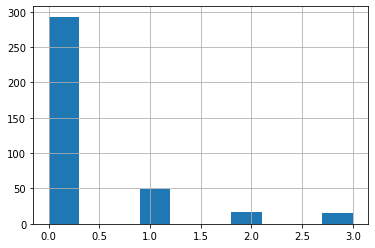

In [59]:
stud.failures.hist()

In [60]:
stud.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [61]:
stud.failures = stud.failures.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.failures = stud.failures.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [62]:
stud.failures = stud.failures.apply(float_to_int)
stud.failures = stud.failures.astype('Int64')
stud.failures

0      0
1      0
2      3
3      0
4      0
      ..
390    2
391    0
392    3
393    0
394    0
Name: failures, Length: 395, dtype: Int64

# schoolsup — дополнительная образовательная поддержка (yes или no)

In [63]:
stud.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

In [64]:
stud.schoolsup = stud.schoolsup.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.schoolsup = stud.schoolsup.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# famsup

семейная образовательная поддержка (yes или no)

In [65]:
stud.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

In [66]:
stud.famsup = stud.famsup.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.famsup = stud.famsup.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# paid — дополнительные платные занятия по математике (yes или no)

In [67]:
stud.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

In [68]:
stud.paid = stud.paid.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.paid = stud.paid.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# activities — дополнительные внеучебные занятия (yes или no)

In [69]:
stud.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

In [70]:
stud.activities = stud.activities.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.activities = stud.activities.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# nursery — посещал детский сад (yes или no)

In [71]:
stud.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

In [72]:
stud.nursery = stud.nursery.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.nursery = stud.nursery.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# higher — хочет получить высшее образование (yes или no)

In [73]:
stud.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

In [74]:
stud.higher = stud.higher.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.higher = stud.higher.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# internet — наличие интернета дома (yes или no)

In [75]:
stud.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

In [76]:
stud.internet = stud.internet.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.internet = stud.internet.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# romantic — в романтических отношениях (yes или no)

In [77]:
stud.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

In [78]:
stud.romantic = stud.romantic.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.romantic = stud.romantic.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [79]:
stud.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [80]:
stud.famrel = stud.famrel[stud.famrel != -1.0]

In [81]:
stud.famrel = stud.famrel.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.famrel = stud.famrel.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [82]:
stud.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

In [83]:
stud.famrel = stud.famrel.apply(float_to_int)
stud.famrel = stud.famrel.astype('Int64')
stud.famrel.head(10)

0       4
1       5
2       4
3       3
4       4
5       5
6       4
7       4
8    <NA>
9       5
Name: famrel, dtype: Int64

# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [84]:
stud.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

In [85]:
stud.freetime = stud.freetime.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.freetime = stud.freetime.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [86]:
stud.freetime = stud.freetime.apply(float_to_int)
stud.freetime = stud.freetime.astype('Int64')
stud.freetime.head(10)

0    3
1    3
2    3
3    2
4    3
5    4
6    4
7    1
8    2
9    5
Name: freetime, dtype: Int64

# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [87]:
stud.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

In [88]:
stud.goout = stud.goout.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.goout = stud.goout.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [89]:
stud.goout = stud.goout.apply(float_to_int)
stud.goout = stud.goout.astype('Int64')
stud.goout.head(10)

0    4
1    3
2    2
3    2
4    2
5    2
6    4
7    4
8    2
9    1
Name: goout, dtype: Int64

# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [90]:
stud.health.head(10)

0    3.0
1    3.0
2    3.0
3    5.0
4    5.0
5    5.0
6    3.0
7    1.0
8    1.0
9    5.0
Name: health, dtype: float64

In [91]:
stud.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [92]:
stud.health = stud.health.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.health = stud.health.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [93]:
stud.health = stud.health.apply(float_to_int)
stud.health = stud.health.astype('Int64')
stud.health.head(10)

0    3
1    3
2    3
3    5
4    5
5    5
6    3
7    1
8    1
9    5
Name: health, dtype: Int64

# absences — количество пропущенных занятий

In [94]:
stud.absences.head(10)

0     6.0
1     4.0
2    10.0
3     2.0
4     4.0
5    10.0
6     0.0
7     6.0
8     0.0
9     0.0
Name: absences, dtype: float64

In [95]:
stud.absences = stud.absences.astype(str).apply(
    lambda x: None if x.strip() == "" else x)
stud.absences = stud.absences.apply(
    lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [96]:
stud.absences = stud.absences.apply(float_to_int)
stud.absences = stud.absences.astype('Int64')
stud.absences.head(10)

0     6
1     4
2    10
3     2
4     4
5    10
6     0
7     6
8     0
9     0
Name: absences, dtype: Int64

<AxesSubplot:>

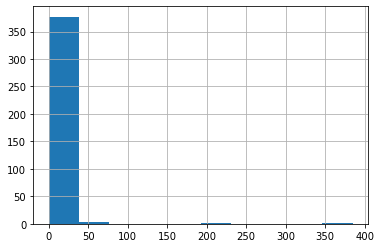

In [97]:
stud.absences.hist()

очищаем выбросы 

Межквартальный размах: 8.0 Квантиль 0.75: 8.0 Квантиль 0.25: 0.0 Границы выбросов: [-4.0,12.0]


<AxesSubplot:>

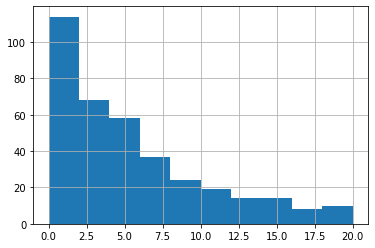

In [98]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
per075 = stud.absences.quantile(0.75)
per025 = stud.absences.quantile(0.25)
print("Межквартальный размах: {}".format(IQR),
      "Квантиль 0.75: {}".format(per075),
      "Квантиль 0.25: {}".format(per025),
      "Границы выбросов: [{f},{i}]".format(f=per075-1.5*IQR, i=per025+1.5*IQR))
stud = stud.loc[stud.absences.between(per025 - 1.5*IQR, per075 + 1.5*IQR)]
stud.absences.hist()

# score — баллы по госэкзамену по математике

In [99]:
stud.loc[:, ["score"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   361 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [100]:
stud.score.value_counts()

50.0     53
55.0     42
0.0      36
75.0     31
65.0     30
60.0     29
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
35.0      9
90.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

In [101]:
stud.score.apply(lambda x: None if str(x).strip() == "" else x)

0      30.0
1      30.0
2      50.0
3      75.0
4      50.0
       ... 
389     0.0
391    80.0
392    35.0
393    50.0
394    45.0
Name: score, Length: 366, dtype: float64

# Корреляционный анализ 

In [102]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,score,studytime
0,GP,F,18,U,None,A,4,4,at_home,teacher,...,yes,None,no,4,3,4,3,6,30.0,2
1,GP,F,17,U,GT3,None,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,30.0,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,None,4,3,2,3,10,50.0,2
3,GP,F,15,U,GT3,T,4,2,health,None,...,yes,yes,yes,3,2,2,5,2,75.0,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,50.0,2


In [103]:
stud.corr()

,age,Medu,Fedu,traveltime,failures,famrel,freetime,goout,health,absences,score,studytime
age,1.000000,-0.182463,-0.147970,0.085659,0.195400,0.059219,0.058193,0.135466,-0.067958,0.151493,-0.159306,0.003035
Medu,-0.182463,1.000000,0.268485,-0.197009,-0.249754,-0.030272,0.027861,0.049094,-0.052316,0.065712,0.210257,0.085532
Fedu,-0.147970,0.268485,1.000000,0.034365,-0.154887,0.037931,-0.068306,-0.032023,0.027048,-0.015516,0.069961,0.054312
traveltime,0.085659,-0.197009,0.034365,1.000000,0.085026,-0.032677,-0.008602,0.031481,-0.006809,-0.047995,-0.074045,-0.093825
failures,0.195400,-0.249754,-0.154887,0.085026,1.000000,0.033541,0.098642,0.085448,0.084991,0.081801,-0.329542,-0.174802
famrel,0.059219,-0.030272,0.037931,-0.032677,0.033541,1.000000,0.166362,0.084396,0.092425,-0.073509,0.057343,0.018376
freetime,0.058193,0.027861,-0.068306,-0.008602,0.098642,0.166362,1.000000,0.289474,0.038437,0.093436,0.034952,-0.136510
goout,0.135466,0.049094,-0.032023,0.031481,0.085448,0.084396,0.289474,1.000000,0.002320,0.111587,-0.122246,-0.034197
health,-0.067958,-0.052316,0.027048,-0.006809,0.084991,0.092425,0.038437,0.002320,1.000000,-0.014358,-0.057202,-0.090552
absences,0.151493,0.065712,-0.015516,-0.047995,0.081801,-0.073509,0.093436,0.111587,-0.014358,1.000000,0.081274,-0.078099


Какие переменные  слабо  коррелериют с score ?
1. freetime	
2. health
3. Fedu
4. famrel
5. absences

Анализ дпеременных c хорошей корреляцией 


1. age-score -0.16 отрицательная корреляция с возрастом это значит что чем старше дети тем меньше результаты итогового теста 
2. Medu-score 0.21 чем лучше образование матери тем больше результат 
3. failures-score -0.32 Чем больше неучебных неудач тем меньше результат !!!!!
4. goout -0.12	 тем больше дети гуляют тем хуже. результат
5. studytime 0.11 чем больше дети посвещают учебе чем лучше результат




# Анализ номинативных переменных

у нас были выявлены следущие номинативные переменные: school,sex,address,famsize,Pstatus,reason,guardians,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic, Mjob', Fjob у каждой из них не более 3 уникальных значений

In [ ]:
stud_math = stud
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

# Вывод

В целом для предсказания будущей модели я бы использовал age, Medu, failures , goout, studytime и Mjob.

Данные были в хорошем ввиде. 
Выбросы были устранены из колонки absences .
Также была удалено неправильное значение из Fedu и famrel. 
Из studytime был удален лишний столбец.
Также в каждой колонке были заменены  и исправлены  Nan значения , также нужные данные были преобразованы в int .